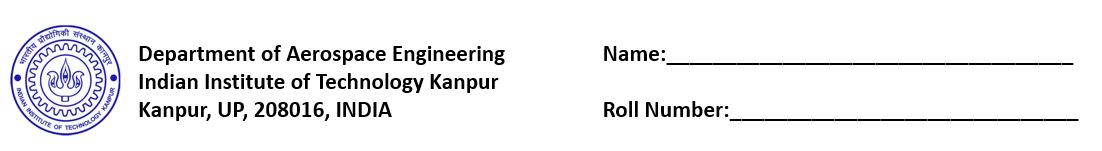

## NAME -- AKASH SINGH


## Exercise on Optimization OPT01

###  Purpose of this worksheet is to Implement and experiment with first order optimization algorithms and its varients.

### Exercises with 1D Gradient Descent and Variants

##### TASK 1: 
(a) The function used in the 1D codes is $f(x)=10x^3-5x+3$\
You are expected to use different functions and watch GD and MAGD in action for your functions. If possible modify the codes to implement animation of GD and MAGD steps from initial guess to the minimum point of interest \(b) Implement the Nestrov Assisted Gradient Descent (NAGD) for the functions of your choice and compare and comment on the three approaches- GD, MAGD and NAGD. Plot the variation of the function value vs number of iterations for the optimization.


### 1D Gradient Descent 

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import plotly.graph_objects as go
import numpy as np
import imageio

#  defining The function and its derivative
def f(x):
    return 10*x**3 - 5*x + 3

def d(x):
    return 30*x**2 - 5

#  Implementing gradient descent algorithm as a function.
def GD(x,lr,tol,converged = False):
    x_list = [x]
    f_list = [f(x)]
    while not converged:
        x_old = x
        x = x - lr*d(x)
        x_list.append(x)
        f_list.append(f(x))
        delta_x = abs(x-x_old)
        delta_f = abs(f(x)-f(x_old))

        if (delta_x < tol) or (delta_f < tol):
            converged = True 
    return f_list,x_list

#  Visualising the gradient flow and convergance plot.
def plotting(x,lr,tol):
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    plt.plot(np.linspace(-0.5,0.8,200),f(np.linspace(-0.5,0.8,200)))
    f_l,x_l = GD(x,lr,tol)
    plt.plot(x_l,f_l,marker = 'o',linestyle = '--',color = 'red')
    plt.xlabel('x-->')
    plt.ylabel('f(x)-->')
    plt.title(f'Gradient descent for lr ={lr}')
    plt.subplot(122)
    plt.plot(np.arange(1,len(f_l)+1),f_l,marker ='*',linestyle ='--')
    plt.xlabel('iteration-->')
    plt.ylabel('f(x)-->')
    plt.title(f'Convergence plot for lr ={lr} ')
    plt.tight_layout()
    plt.show()


def animate_gradient_descent(x_vals, y_vals, x_l, f_l, width=800, height=600):
    """
    Creates and displays an animation of the gradient descent process on the function f(x).

    Parameters:
    x_vals (list or array): X values for plotting the function f(x).
    y_vals (list or array): Corresponding Y values for f(x).
    x_l (list or array): X values obtained during gradient descent.
    f_l (list or array): Corresponding Y values (f(x)) during gradient descent.
    width (int): Width of the plot.
    height (int): Height of the plot.
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='f(x)', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[x_l[0]], y=[f_l[0]], mode='markers', name='Initial Point',
                             marker=dict(color='red', size=10)))

    frames = [
        go.Frame(data=[
            go.Scatter(x=x_vals, y=y_vals, mode='lines', name='f(x)', line=dict(color='blue')),  # Keep original function plot
            go.Scatter(x=x_l[:k+1], y=f_l[:k+1], mode='lines+markers',
                       line=dict(color='red', dash='dash'),
                       marker=dict(color='black', size=7))
        ]) for k in range(1, len(x_l))
    ]

    fig.update_layout(
        width=width,
        height=height,
        updatemenus=[dict(type='buttons', showactive=False,
                          buttons=[dict(label='Play',
                                        method='animate',
                                        args=[None, dict(frame=dict(duration=200, redraw=True),
                                                         fromcurrent=True, mode='immediate')]),
                                   dict(label='Pause',
                                        method='animate',
                                        args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate')])])],
        xaxis=dict(range=[min(x_vals), max(x_vals)], autorange=False),
        yaxis=dict(range=[min(y_vals), max(y_vals)], autorange=False)
    )

    fig.frames = frames
    fig.show()    


plotting(-0.3,0.03,1e-4) 

plotting(-0.3,0.08,1e-4) 

In [ ]:
x_vals = np.linspace(-0.5, 0.8, 400)
y_vals = f(x_vals)
f_l1,x_l1 = GD(-0.3, 0.03, 1e-4) 
f_l2,x_l2 = GD(-0.3, 0.08, 1e-4) 

animate_gradient_descent(x_vals, y_vals, x_l1, f_l1, width=1000, height=500)
animate_gradient_descent(x_vals, y_vals, x_l2, f_l2, width=1000, height=500)


I used a cubic polynomial function , 
$$
10x^3 - 5x + 3
$$
in the domain of $[-1,1]$

I choosed x = -0.3 as initial guess for both small and large learning rates to compare the path gradient takes for different learning rates.


### 1D Momentum Assisted Gradient Descent 

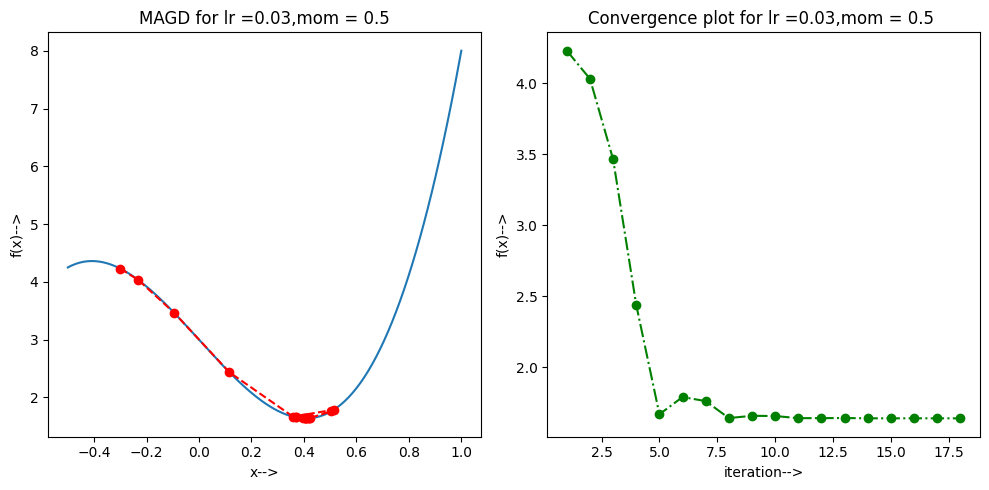

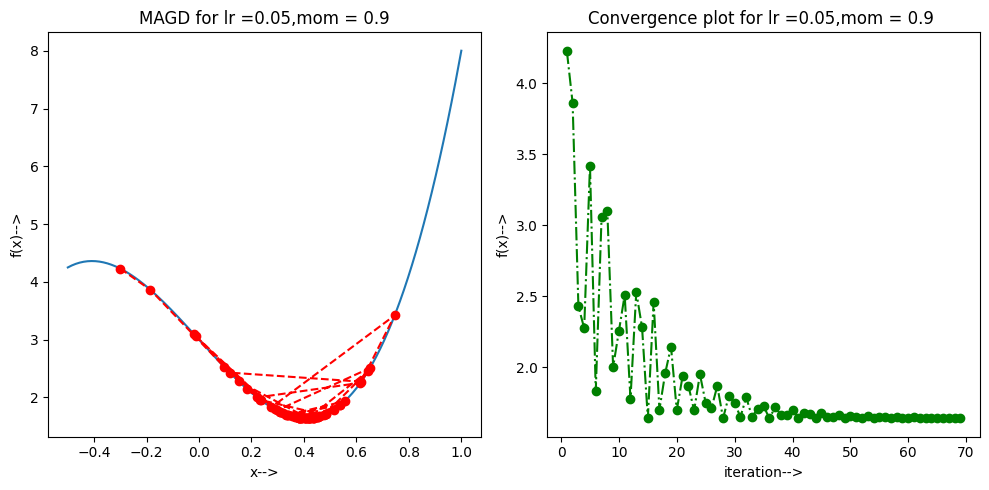

In [43]:
#  function and its derivative
def f(x):
    return 10*x**3 - 5*x + 3

def d(x):
    return 30*x**2 - 5


#  Implementing momentum accelerated gradient descent algorithm .
def MAGD(x,lr,m,tol,converged = False):
    v= 0
    list_x = [x]
    list_f = [f(x)]
    while not converged:
        x_old = x
        v = m*v +lr*d(x)
        x = x - v
        list_x.append(x)
        list_f.append(f(x))
        delta_x = abs(x - x_old)
        delta_f = abs(f(x) - f(x_old))

        if  (delta_x < tol) or (delta_f < tol):
            converged = True
    return list_f , list_x    
    
def plot_MAGD(x,lr,m,tol):
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    plt.plot(np.linspace(-0.5,1,200),f(np.linspace(-0.5,1,200)))
    f_l,x_l = MAGD(x,lr,m,tol)
    plt.plot(x_l,f_l,marker = 'o',linestyle = '--',color = 'red')
    plt.xlabel('x-->')
    plt.ylabel('f(x)-->')
    plt.title(f'MAGD for lr ={lr},mom = {m}')
    plt.subplot(122)

    plt.plot(np.arange(1,len(f_l)+1),f_l,marker = 'o',linestyle = '-.',color = 'green')
    plt.xlabel('iteration-->')
    plt.ylabel('f(x)-->')
    plt.title(f'Convergence plot for lr ={lr},mom = {m} ')
    plt.tight_layout()
    plt.show()

plot_MAGD(-0.3,0.03,0.5,1e-4) 

plot_MAGD(-0.3,0.05,0.9,1e-4)



In [ ]:
x_vals = np.linspace(-0.5,1,200)
y_vals = f(x_vals)

f_l1,x_l1 = MAGD(-0.3,0.03,0.5,1e-4)
f_l2,x_l2 = MAGD(-0.3,0.05,0.9,1e-4)

animate_gradient_descent(x_vals, y_vals, x_l1, f_l1, width=1000, height=500)
animate_gradient_descent(x_vals, y_vals, x_l2, f_l2, width=1000, height=500)

**Observations:**

1- by adding more momentum the effect of update caused by recent gradient gets reduced and history prevails over recent gradient ,consequently. it is succeptible of oscillation in the viscinity of minima (i.e. in the vicinity of minima it will have more tendency to fluctuate)

*if it is making the convergance more noisy near minima then what is even the purpose of using it?*

major problem in optimization is getting stuck in saddle points(i.e gradients are very small but its not the minima) and local minima

2 - by adding the information about previous gradients it helps in overcoming such problems

momentum accelerated gradient descent resemble a lot with physical concept of inertia i.e it dificult to start since at the time of start we have no history of gradients , and when it starts it is difficult to stop since we have enough history of gradients and new gradients makes little change in direction of movement if more and more momentum is applied

3 - momentum assisted gradient descent can be seen as exponential smoothening of gradients , depending on "m" applied,it creates a window taking average of gradients over that window $$1/(1-m)$$ , and then considering all the history of the same window ,it takes new step update.


### 1D Nestrove accelerated gradient descent

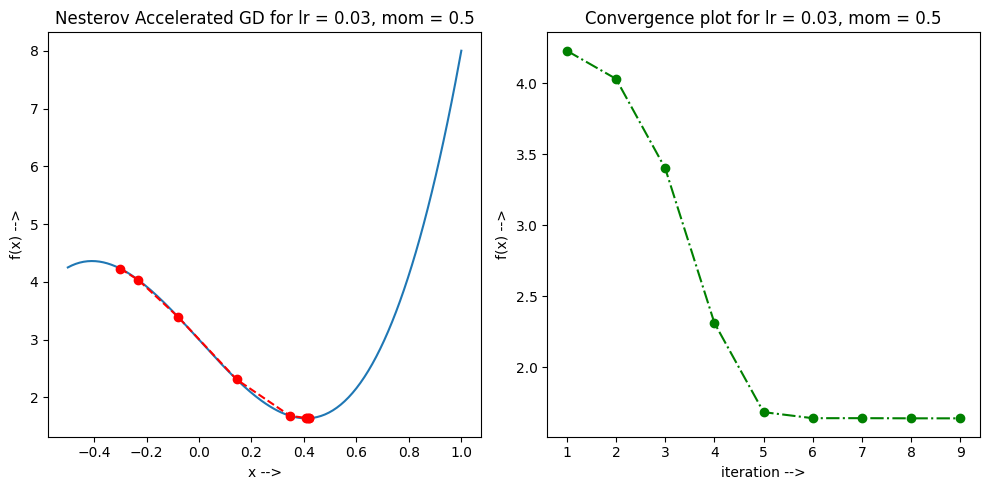

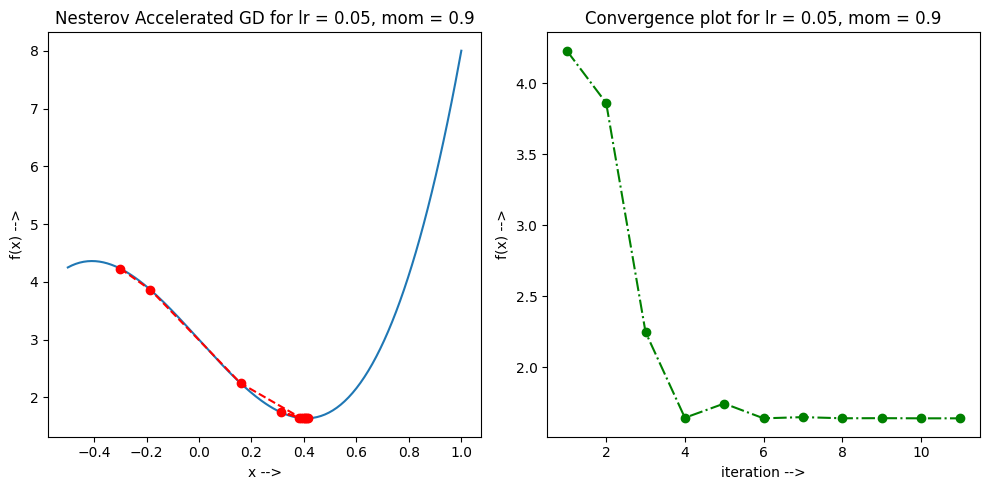

In [45]:
# Define the function and its derivative
def f(x):
    return 10 * x**3 - 5 * x + 3

def d(x):
    return 30 * x**2 - 5

# Implementing Nesterov Accelerated Gradient Descent
def Nesterov_Accelerated_GD(x, lr, m, tol, converged=False):
    v = 0
    list_x = [x]
    list_f = [f(x)]
    
    while not converged:
        x_old = x
        v_prev = v
        v = m * v + lr * d(x - m * v)  # Nesterov update formula
        x = x - v
        list_x.append(x)
        list_f.append(f(x))
        
        delta_x = abs(x - x_old)
        delta_f = abs(f(x) - f(x_old))

        if delta_x < tol or delta_f < tol:
            converged = True
    
    return list_f, list_x

def plot_Nesterov_Accelerated_GD(x, lr, m, tol):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    x_range = np.linspace(-0.5, 1, 200)
    plt.plot(x_range, f(x_range))
    
    f_l, x_l = Nesterov_Accelerated_GD(x, lr, m, tol)
    plt.plot(x_l, f_l, marker='o', linestyle='--', color='red')
    plt.xlabel('x -->')
    plt.ylabel('f(x) -->')
    plt.title(f'Nesterov Accelerated GD for lr = {lr}, mom = {m}')
    
    plt.subplot(122)
    plt.plot(np.arange(1, len(f_l) + 1), f_l, marker='o', linestyle='-.', color='green')
    plt.xlabel('iteration -->')
    plt.ylabel('f(x) -->')
    plt.title(f'Convergence plot for lr = {lr}, mom = {m}')
    plt.tight_layout()
    plt.show()

# Example usage
plot_Nesterov_Accelerated_GD(-0.3, 0.03, 0.5, 1e-4)
plot_Nesterov_Accelerated_GD(-0.3, 0.05, 0.9, 1e-4)

In [ ]:
x_vals = np.linspace(-0.5, 1, 200)
y_vals = f(x_vals)

f_l1,x_l1 = Nesterov_Accelerated_GD(-0.3, 0.03, 0.5, 1e-4)
f_l2,x_l2 = Nesterov_Accelerated_GD(-0.3, 0.05, 0.9, 1e-4)

animate_gradient_descent(x_vals, y_vals, x_l1, f_l1, width=1000, height=500)
animate_gradient_descent(x_vals, y_vals, x_l2, f_l2, width=1000, height=500)

#### TASK 2: 
(a) The function used in the 2D codes is Famous Rosenbrok function.
Experimented with different starting locations to assess their influence on the route to the target.  Implemented the Nestrov Assisted Gradient Descent (NAGD)  and compared the three approaches- GD, MAGD and NAGD. Plotted the variation of the function value vs number of iterations for the optimization.

## 2D Gradient Descent 

i've used Rosenbrock function, often called the Rosenbrock's valley or Rosenbrock's banana function, is a non-convex mathematical function used in optimization. It is commonly used to test optimization algorithms because it has a narrow, curved valley with a global minimum that is challenging to locate.

$$f(x, y) = (a - x)^2 + b(y - x^2)^2$$
$$a=0 , b =60$$


**Convergence plots are in semilog scale to amplify the behaviour of convergence in viscinity of minima (movement of gradient descent is smaller there)**

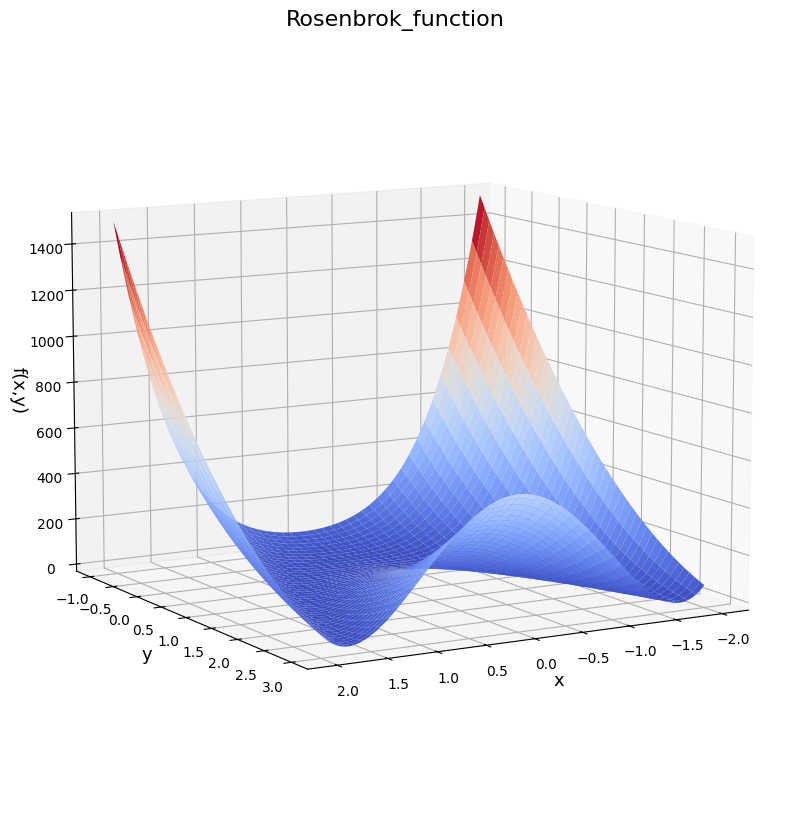

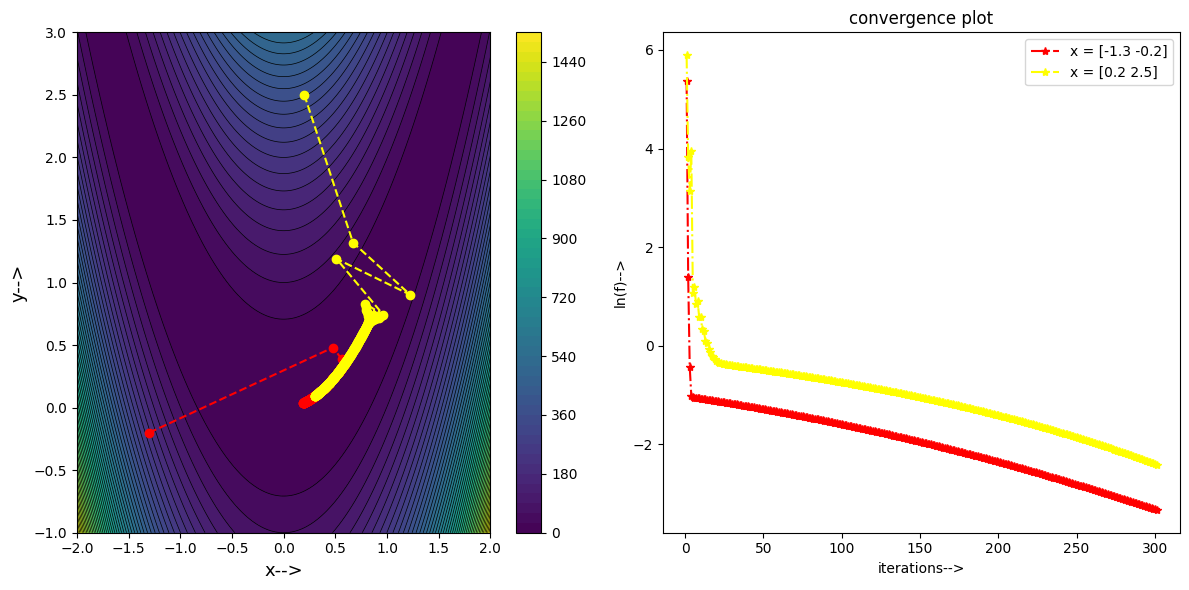

In [56]:
from mpl_toolkits.mplot3d import Axes3D

#  Function and partial derivatives
def f(x,y):
    return x**2 + 60*(y-x**2)**2  #rosenbrok function

def dx(x,y):
    return 2*x -240*(x*y -x**3)

def dy(x,y):
    return 120*(y-x**2)

def grad_f(x):
    grad = np.array([dx(x[0],x[1]),dy(x[0],x[1])])
    return grad

# defining gradient descent function for 2d rosenbrok function
def GD_2D(x,lr,tol,converged = False):
    list_x = x
    list_f = np.array([f(x[0],x[1])])
    iter = 0
    while not converged:
        x_o = x
        x = x - lr*grad_f(x)
        delta_f = abs(f(x[0],x[1])-f(x_o[0],x_o[1]))
        delta_x = np.sqrt((x-x_o)[0]**2 + (x-x_o)[1]**2)

        list_x = np.vstack((list_x,x))
        list_f = np.vstack((list_f,np.array([f(x[0],x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter ==300):
            converged = True   
    return list_f , list_x


# Setting up the grid for contour plot
x_vals = np.linspace(-2, 2, 180)
y_vals = np.linspace(-1, 3, 180)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)


plt.figure(figsize = (10,10))
ax =plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_title('Rosenbrok_function',fontsize = '16')
ax.set_xlabel('x',fontsize = '13')
ax.set_ylabel('y',fontsize = '13')
ax.set_zlabel('f(x,y)',fontsize = '13')
ax.view_init(elev=10, azim=60)  
plt.show()



# Initial points for gradient descent
x_start1 = np.array([-1.3, -0.2])  # Starting at a high gradient location
x_start2 = np.array([0.2, 2.5])    # Starting at a relatively low gradient location

f_vals1, path1 = GD_2D(x_start1, lr=0.003, tol=1e-4)
f_vals2, path2 = GD_2D(x_start2, lr=0.004, tol=1e-4)

plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.xlabel('x-->',fontsize = '13')
plt.ylabel('y-->',fontsize = '13')
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)

plt.plot(path1[:,0],path1[:,1],marker = 'o',linestyle = '--' ,color ='red')
plt.plot(path2[:,0],path2[:,1],marker = 'o',linestyle = '--' ,color ='yellow')


plt.subplot(122)
plt.plot(np.arange(1,path1.shape[0]+1),np.log(f_vals1),marker = '*',linestyle = '-.',c= 'red',label =f'x = {x_start1}')
plt.plot(np.arange(1,path2.shape[0]+1),np.log(f_vals2),marker = '*',linestyle = '-.',c= 'yellow',label =f'x = {x_start2}')
plt.legend()
plt.xlabel('iterations-->')
plt.ylabel('ln(f)-->')
plt.title('convergence plot')
plt.tight_layout()
plt.show()

In [ ]:
fig = go.Figure()

# Contour plot of the Rosenbrock function (base plot)
contour = go.Contour(z=Z, x=x_vals, y=y_vals, colorscale='Viridis', opacity=0.8, 
                     contours=dict(start=0, end=3000, size=100))
fig.add_trace(contour)

# Add initial points
fig.add_trace(go.Scatter(x=[path1[0, 0]], y=[path1[0, 1]], mode='markers', marker=dict(color='red', size=10), name='Start 1'))
fig.add_trace(go.Scatter(x=[path2[0, 0]], y=[path2[0, 1]], mode='markers', marker=dict(color='yellow', size=10), name='Start 2'))

# Create animation frames
frames = []
for k in range(1, max(len(path1), len(path2))):
    frame_data = [contour]  # Keep the contour plot in every frame
    
    if k < len(path1):
        frame_data.append(go.Scatter(x=path1[:k+1, 0], y=path1[:k+1, 1], mode='lines+markers',
                                     line=dict(color='red', dash='dash'),
                                     marker=dict(color='black', size=7), name='Path 1'))
    if k < len(path2):
        frame_data.append(go.Scatter(x=path2[:k+1, 0], y=path2[:k+1, 1], mode='lines+markers',
                                     line=dict(color='yellow', dash='dash'),
                                     marker=dict(color='black', size=7), name='Path 2'))
    
    frames.append(go.Frame(data=frame_data))
# Add play/pause buttons
fig.update_layout(
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play', method='animate', 
                                    args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]),
                               dict(label='Pause', method='animate', 
                                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate')])])],
    xaxis=dict(range=[-2, 2], autorange=False),
    yaxis=dict(range=[-1, 3], autorange=False),
    title = '2D Gradient Descent on Rosenbrock Function',
    width=900,
    height=500
)

fig.frames = frames[::3]

# Show the figure
fig.show()



##### Gradient descent without momentum(observations)
2 different initialising points are chosen ,one at the location where gradients are high and another where gradients are relatively low , to demonstrate the effect of initialisation , specially for this non convex function, where gradients are high at most of the points

1 -> choice of learning rate(lr) becomes more crucial in the functions where narrow vallies are present.(otherwise GD will not converge)

2 -> near the minima GD got stuck in plateu (gradients vanished)


### 2D Momentum Assisted Gradient Descent 

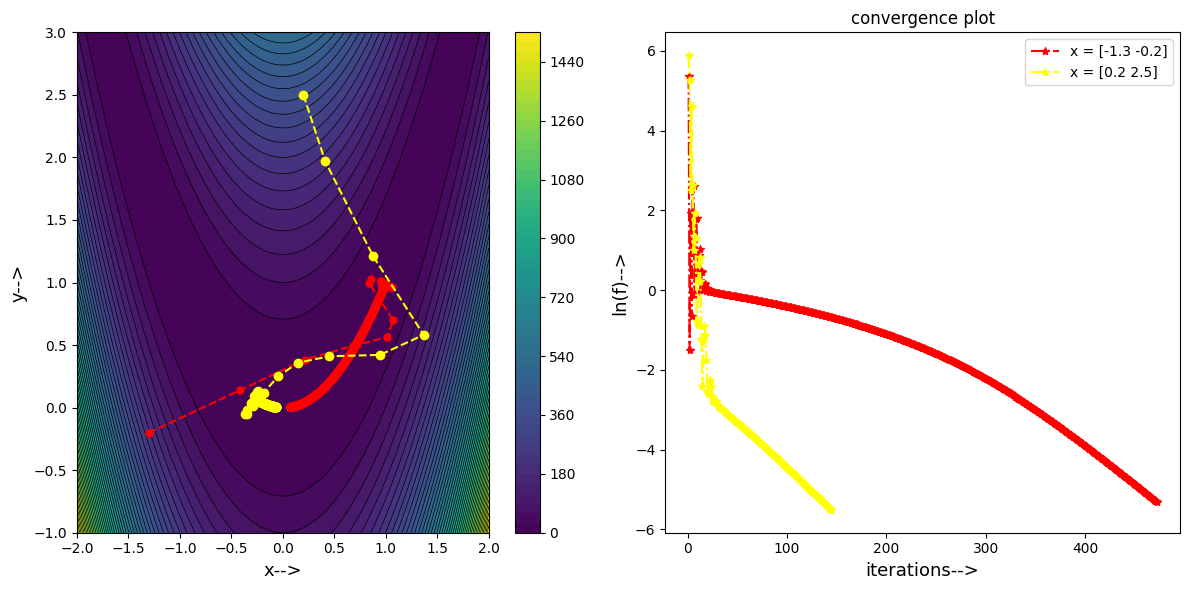

In [67]:
#  Function and partial derivatives
def f(x,y):
    return x**2 + 60*(y-x**2)**2  #rosenbrok function

def dx(x,y):
    return 2*x -240*(x*y -x**3)

def dy(x,y):
    return 120*(y-x**2)

def grad_f(x):
    grad = np.array([dx(x[0],x[1]),dy(x[0],x[1])])
    return grad


def GD_2D_mom(x, lr ,m ,tol ,converged = False):
    list_x = x
    list_f = np.array([f(x[0],x[1])])
    v = np.array([0,0])
    iter = 0
    while not converged:
        x_o = x
        v= m*v + (1-m)*grad_f(x)
        x = x - v*lr
        delta_f = abs(f(x[0],x[1])-f(x_o[0],x_o[1]))
        delta_x = np.sqrt((x-x_o)[0]**2 + (x-x_o)[1]**2)

        list_x = np.vstack((list_x,x))
        list_f = np.vstack((list_f,np.array([f(x[0],x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter ==500):
            converged = True   
    return list_f , list_x
x = np.linspace(-2,2,300)
y = np.linspace(-1,3,300)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)


#plotting the surface plot of rosenbrok function
#plt.figure(figsize = (10,10))
#ax =plt.subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z, cmap='jet')
#ax.view_init(elev=10, azim=60)  # Adjust the elevation and azimuthal angles
#plt.show()


#x_i = np.array([-0.1,-0.6])
f_vals1 , path1 = GD_2D_mom(x_start1,0.005,0.7,1e-4)
#x_i1 = np.array([0.2,2.5])
f_vals2 , path2 = GD_2D_mom(x_start2,0.006,0.7,1e-4)


plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)
plt.xlabel('x-->',fontsize =13)
plt.ylabel('y-->',fontsize =13)
plt.plot(path1[:,0],path1[:,1],marker = 'o',markersize = 5,linestyle = '--' ,color ='red')
plt.plot(path2[:,0],path2[:,1],marker = 'o',linestyle = '--' ,color ='yellow')

plt.subplot(122)
plt.plot(np.arange(1,f_vals1.shape[0]+1),np.log(f_vals1),marker = '*',linestyle = '-.',c= 'red',label =f'x = {x_start1}')
plt.plot(np.arange(1,f_vals2.shape[0]+1),np.log(f_vals2),marker = '*',linestyle = '-.',c= 'yellow',label =f'x = {x_start2}')
plt.legend()
plt.xlabel('iterations-->',fontsize = 13)
plt.ylabel('ln(f)-->',fontsize = 13)
plt.title('convergence plot')
plt.tight_layout()
plt.show()


##### Gradient descent with momentum(observations):
again same initialisation pointes are chosen , keeping all the hyperparametres same to see the effect of addition of momentum to gradient updates

1 -> Using momentum convergence becomes faster as well as more accurate.(because of history now algorithm is not getting stuck at plateu) 

### Gradient Descent in 2D for Function with more than one Minima

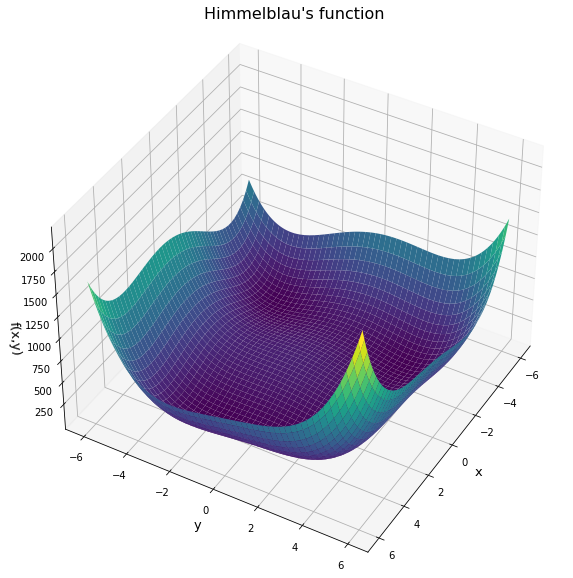

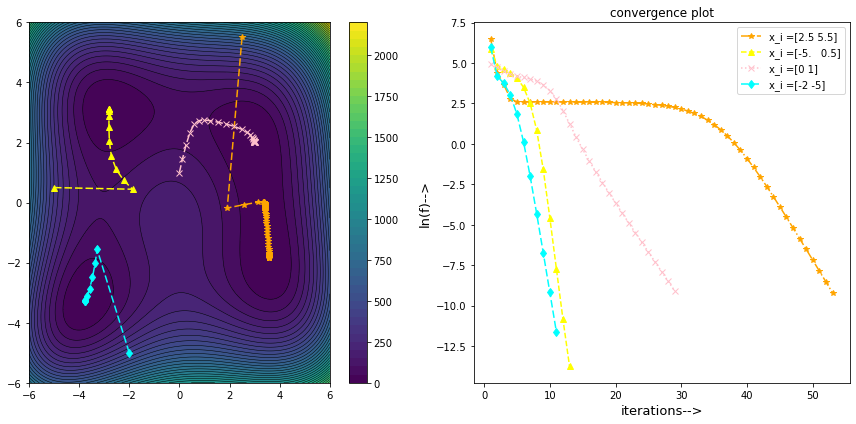

In [131]:
from mpl_toolkits.mplot3d import Axes3D

#  Function and partial derivatives
def g(x,y):
    return (x**2 + y - 11)**2 + (x +y**2 - 7)**2  # Himmelblau's function

def d_x(x,y):
    return 4*(x**3 + x*y - 11*x) + 2*(x +y**2 - 7)

def d_y(x,y):
    return 2*(x**2 + y - 11) + 4*(x*y +y**3 - 7*y)

def grad_g(x):
    grad = np.array([d_x(x[0],x[1]),d_y(x[0],x[1])])
    return grad


# implementing gradient descent
def GD_2D_multi(x ,lr ,tol ,converged = False):
    list_x = x
    list_f = np.array([g(x[0],x[1])])
    iter = 0
    while not converged:
        x_o = x
        x = x - lr*grad_g(x)
        delta_f = abs(g(x[0],x[1])-g(x_o[0],x_o[1]))
        delta_x = np.sqrt((x-x_o)[0]**2 + (x-x_o)[1]**2)

        list_x = np.vstack((list_x,x))
        list_f = np.vstack((list_f,np.array([g(x[0],x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter ==150):
            converged = True   
    return list_f , list_x



x = np.linspace(-6,6,150)
y = np.linspace(-6,6,150)
X,Y = np.meshgrid(x,y)
Z = g(X,Y)

# experimenting with different initial poins
x_i = np.array([2.5,5.5])
l_f , l_x = GD_2D_multi(x_i,0.01,1e-4)

x_i1 = np.array([-5,0.5])
l_f1 , l_x1 = GD_2D_multi(x_i1,0.01,1e-4)

x_i2 = np.array([0,1])
l_f2 , l_x2 = GD_2D_multi(x_i2,0.01,1e-4)

x_i3 = np.array([-2,-5])
l_f3 , l_x3 = GD_2D_multi(x_i3,0.01,1e-4)


# visualising Himmelblau's function in 3D
plt.figure(figsize = (10,10))
ax =plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Himmelblau's function",fontsize = 16)
ax.set_xlabel('x',fontsize = 13)
ax.set_ylabel('y',fontsize = 13)
ax.set_zlabel('f(x,y)',fontsize = 13)
ax.view_init(elev=40, azim=30)  
plt.show()

# visualisation of contour plot
plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)
plt.plot(l_x[:,0],l_x[:,1],marker = '*',markersize = '6',linestyle = (0, (5, 2)) ,color ='orange')
plt.plot(l_x1[:,0],l_x1[:,1],marker = '^',markersize = '6',linestyle = (0, (5, 2)) ,color ='yellow')
plt.plot(l_x2[:,0],l_x2[:,1],marker = 'x',markersize = '6',linestyle = (0, (5, 2)) ,color ='pink')
plt.plot(l_x3[:,0],l_x3[:,1],marker = 'd',markersize = '6',linestyle=(0, (5, 2)) ,color ='cyan')

# plots to visualise convergence behaviour
plt.subplot(122)
plt.plot(np.arange(1,l_f.shape[0]+1),np.log(l_f),c='orange',marker = '*',linestyle = '-.',label =f'x_i ={x_i}')
plt.plot(np.arange(1,l_f1.shape[0]+1),np.log(l_f1),c='yellow',marker = '^',linestyle = '--',label =f'x_i ={x_i1}')
plt.plot(np.arange(1,l_f2.shape[0]+1),np.log(l_f2),c='pink',marker = 'x',linestyle = ':',label =f'x_i ={x_i2}')
plt.plot(np.arange(1,l_f3.shape[0]+1),np.log(l_f3),c='cyan',marker = 'd',linestyle = (0, (5, 2)),label =f'x_i ={x_i3}')
plt.xlabel('iterations-->',fontsize = 13)
plt.ylabel('ln(f)-->',fontsize = 13)
plt.title(f'convergence plot')
plt.legend()
plt.tight_layout()
plt.show()

##### Gradient Descent in 2D for Function with more than one Minima (Observation)
Wehen functions have multiple minimas choice of location of initialisation becomes important, as it can be seen depending on initialisation algorithm can converge in any of the local minima.

### Gradient Descent with Nesterov Momentum for Function with more than one Minima

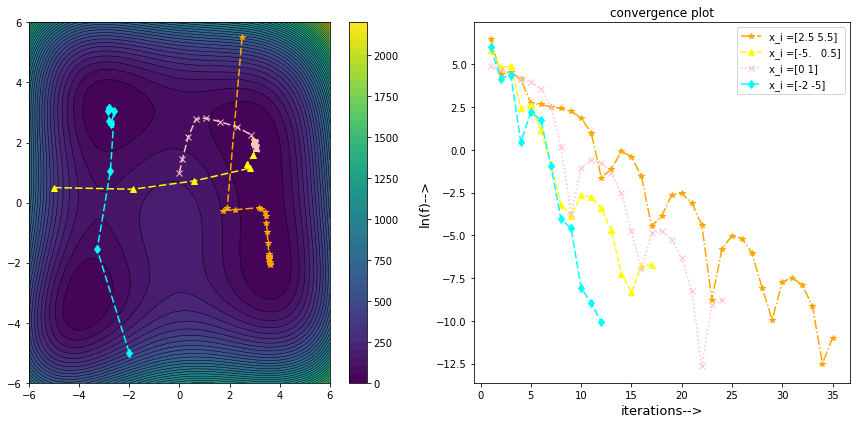

In [134]:
import numpy as np

def g(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2  # Himmelblau's function

def d_x(x, y):
    return 4*(x**3 + x*y - 11*x) + 2*(x + y**2 - 7)

def d_y(x, y):
    return 2*(x**2 + y - 11) + 4*(x*y + y**3 - 7*y)

def grad_g(x):
    grad = np.array([d_x(x[0], x[1]), d_y(x[0], x[1])])
    return grad

# Implementing Nesterov Accelerated Gradient Descent
def NAGD_2D_multi(x, lr, m,  tol, converged=False):
    list_x = x
    list_f = np.array([g(x[0], x[1])])
    iter = 0
    v = np.array([0, 0])  # Initialize velocity to zero

    while not converged:
        x_o = x
        v_prev = v
        v = m * v - lr * grad_g(x + m * v)
        x = x + v
        delta_f = abs(g(x[0], x[1]) - g(x_o[0], x_o[1]))
        delta_x = np.sqrt((x - x_o)[0]**2 + (x - x_o)[1]**2)

        list_x = np.vstack((list_x, x))
        list_f = np.vstack((list_f, np.array([g(x[0], x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter == 150):
            converged = True

    return list_f, list_x

# Initial point
# experimenting with different initial poins
x_i = np.array([2.5,5.5])
l_f , l_x = NAGD_2D_multi(x_i,0.01,0.9,1e-4)

x_i1 = np.array([-5,0.5])
l_f1 , l_x1 = NAGD_2D_multi(x_i1,0.01,0.7,1e-4)

x_i2 = np.array([0,1])
l_f2 , l_x2 = NAGD_2D_multi(x_i2,0.01,0.7,1e-4)

x_i3 = np.array([-2,-5])
l_f3 , l_x3 = NAGD_2D_multi(x_i3,0.01,0.7,1e-4)

## visualisation of contour plot
plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)
plt.plot(l_x[:,0],l_x[:,1],marker = '*',markersize = '6',linestyle = (0, (5, 2)) ,color ='orange')
plt.plot(l_x1[:,0],l_x1[:,1],marker = '^',markersize = '6',linestyle = (0, (5, 2)) ,color ='yellow')
plt.plot(l_x2[:,0],l_x2[:,1],marker = 'x',markersize = '6',linestyle = (0, (5, 2)) ,color ='pink')
plt.plot(l_x3[:,0],l_x3[:,1],marker = 'd',markersize = '6',linestyle=(0, (5, 2)) ,color ='cyan')

# plots to visualise convergence behaviour
plt.subplot(122)
plt.plot(np.arange(1,l_f.shape[0]+1),np.log(l_f),c='orange',marker = '*',linestyle = '-.',label =f'x_i ={x_i}')
plt.plot(np.arange(1,l_f1.shape[0]+1),np.log(l_f1),c='yellow',marker = '^',linestyle = '--',label =f'x_i ={x_i1}')
plt.plot(np.arange(1,l_f2.shape[0]+1),np.log(l_f2),c='pink',marker = 'x',linestyle = ':',label =f'x_i ={x_i2}')
plt.plot(np.arange(1,l_f3.shape[0]+1),np.log(l_f3),c='cyan',marker = 'd',linestyle = (0, (5, 2)),label =f'x_i ={x_i3}')
plt.xlabel('iterations-->',fontsize = 13)
plt.ylabel('ln(f)-->',fontsize = 13)
plt.title(f'convergence plot')
plt.legend()
plt.tight_layout()
plt.show()



#### TASK 4

For all the functions used in your exercises implement the variants of the adaptive gradient descent methods (a) RMSProp (b) AdaGrad and (c) ADAM by modifying the codes used in this exercise. Compare and comment on the differences between all these adaptive gradient methods with SD, MAGD and NAGD methods used in this work. As these methods are available in TensorFlow, Keras and PyTorch you are to compare the outputs from your modified codes with that from TensorFlow, Keras and PyTorch.Plot the variation of the function value vs number of iterations for the optimization.

**(b) -- AdaGrad**

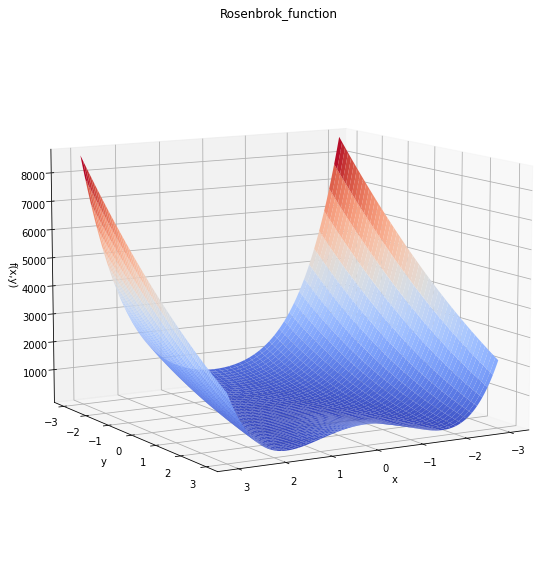

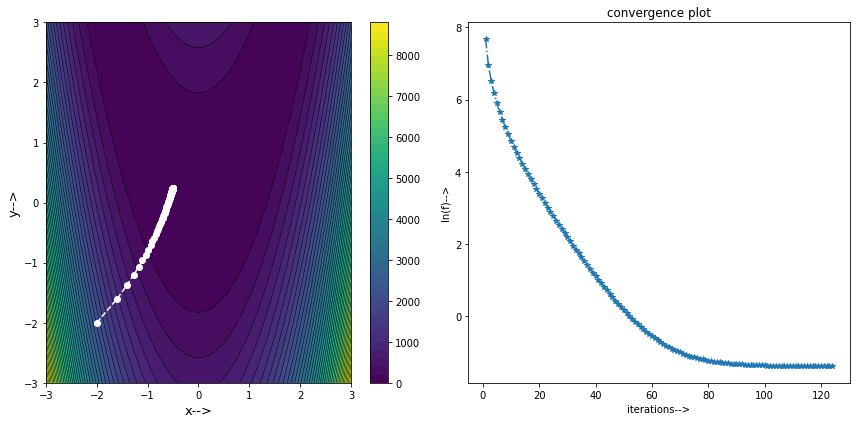

In [136]:
#  Function and partial derivatives
def f(x,y):
    return x**2 + 60*(y-x**2)**2  #rosenbrok function

def dx(x,y):
    return 2*x -240*(x*y -x**3)

def dy(x,y):
    return 120*(y-x**2)

def grad_f(x):
    grad = np.array([dx(x[0],x[1]),dy(x[0],x[1])])
    return grad


def Adagrad(x,lr,tol,converged = False):
    list_x = x
    list_f = np.array([f(x[0],x[1])])
    iter = 0
    s = 0     
    ita = 1e-4  # parameter to give numerical stability to solution
    while not converged:
        x_o = x
        s = s + (grad_f(x))**2
        x = x - lr*(grad_f(x)/np.sqrt(s)+ ita)
        delta_f = abs(f(x[0],x[1])-f(x_o[0],x_o[1]))
        delta_x = np.sqrt((x-x_o)[0]**2 + (x-x_o)[1]**2)

        list_x = np.vstack((list_x,x))
        list_f = np.vstack((list_f,np.array([f(x[0],x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter ==300):
            converged = True   
    return list_f , list_x



x = np.linspace(-3,3,300)
y = np.linspace(-3,3,300)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.figure(figsize = (10,10))
ax =plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_title('Rosenbrok_function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.view_init(elev=10, azim=60)  
plt.show()



x_i = np.array([-2,-2])
l_f , l_x = Adagrad(x_i,0.4,1e-4)

plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.xlabel('x-->',fontsize = 13)
plt.ylabel('y-->',fontsize = 13)
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)
plt.plot(l_x[:,0],l_x[:,1],marker = 'o',linestyle = '--' ,color ='white')


plt.subplot(122)
plt.plot(np.arange(1,l_f.shape[0]+1),np.log(l_f),marker = '*',linestyle = '-.')
plt.xlabel('iterations-->')
plt.ylabel('ln(f)-->')
plt.title('convergence plot')
plt.tight_layout()
plt.show()

Adagrad is a adaptive method (i.e Uses different learning rates for different space coordinates)

it has no momentum , the most important feature of adagrad is learning rate is scaled by Root Mean Square value of **all** previous gradients.
in general while optimising we want to move less where gradients are high , and vice versa , wherein GD does just opposite making it very sensitive to learning rate , So Adagrad reduces the learning rate in the space coordinates where gradients are high , resulting in stable path towards convergence (as can be seen in above plot) and making algorithm less sensitive to learning rate 

But the drawback is it is scaling the gradients by all previous gradients , so near the plateu region or may be in low gradient regions as learning progresses gradients may gets vanished, resulting in slow learning or function may not even converge (as happened while optimising rosenbrok function above)

**(a) -- RMSprop**

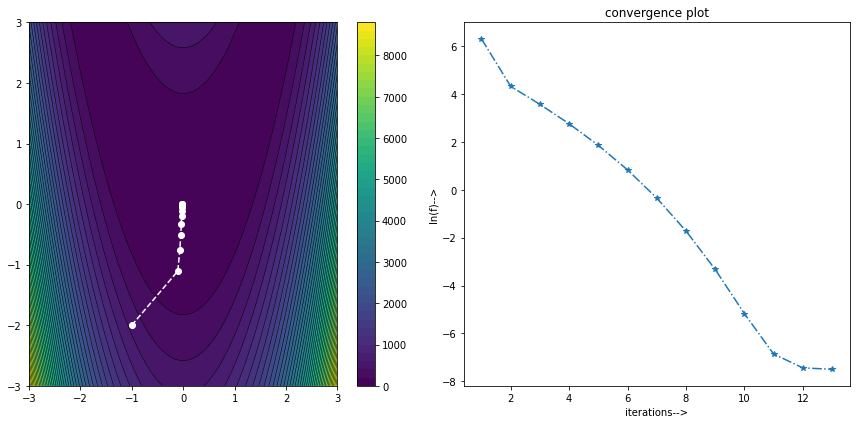

In [20]:
#  Function and partial derivatives
def f(x,y):
    return x**2 + 60*(y-x**2)**2  #rosenbrok function

def dx(x,y):
    return 2*x -240*(x*y -x**3)

def dy(x,y):
    return 120*(y-x**2)

def grad_f(x):
    grad = np.array([dx(x[0],x[1]),dy(x[0],x[1])])
    return grad


def RMSprop(x, beta, lr, tol, converged = False):
    list_x = x
    list_f = np.array([f(x[0],x[1])])
    iter = 0
    s = 0     
    ita = 1e-4  # parameter to give numerical stability to solution
    while not converged:
        x_o = x
        s = beta*s + (1-beta)*(grad_f(x))**2
        x = x - lr*(grad_f(x)/(np.sqrt(s)+ ita))
        delta_f = abs(f(x[0],x[1])-f(x_o[0],x_o[1]))
        delta_x = np.sqrt((x-x_o)[0]**2 + (x-x_o)[1]**2)

        list_x = np.vstack((list_x,x))
        list_f = np.vstack((list_f,np.array([f(x[0],x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter ==300):
            converged = True   
    return list_f , list_x



x = np.linspace(-3,3,300)
y = np.linspace(-3,3,300)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

#plt.figure(figsize = (10,10))
#ax =plt.subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z, cmap='coolwarm')
#ax.set_title('Rosenbrok_function')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('f(x,y)')
#ax.view_init(elev=10, azim=60)  
#plt.show()



x_i = np.array([-1,-2])
l_f , l_x = RMSprop(x_i,0.8,0.4,1e-4)

plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)
plt.plot(l_x[:,0],l_x[:,1],marker = 'o',linestyle = '--' ,color ='white')


plt.subplot(122)
plt.plot(np.arange(1,l_f.shape[0]+1),np.log(l_f),marker = '*',linestyle = '-.')
plt.xlabel('iterations-->')
plt.ylabel('ln(f)-->')
plt.title('convergence plot')
plt.tight_layout()
plt.show()

RMSprop is also an adaptive method.

This algorithm also scales the learning rates inheriting all the properties of Adagrad, but it adresses the problem of vanishing effective gradients encountered in Adagrad by not scaling the learning rate using all the previous gradients rather it scales the learning rate slecing the previou gradients over a chosen window (i.e. exponential averaging or leaky averaging). 

but it increases the no. of hyperparameters to tune (gradient averaging window $beta$ to be chosen)

Here difference can be seen, by using this algorithm convergence becomes much faster than Adagrad, and path is also stable. algoritm is able to locate minima better and faster

*NOTE* -- initialization points are kept same to compare the differences

Comparing RMSprop from GD , MAGD , it converges way faster than them.

**(c) -- ADAM**

RMSprop + Momentum

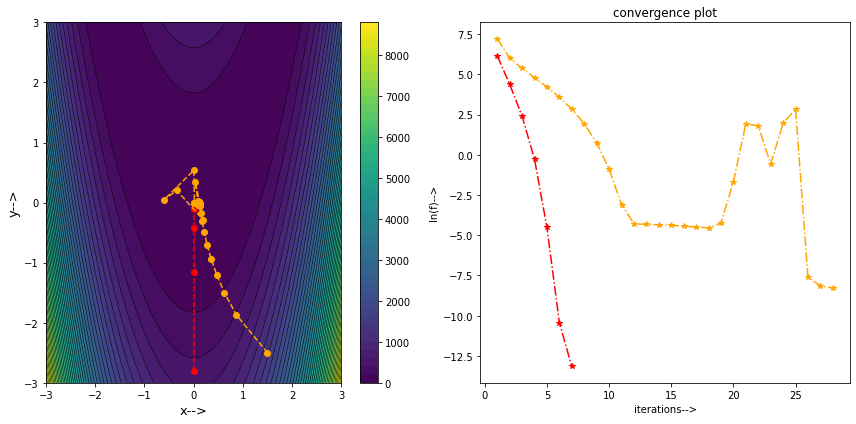

In [32]:
#  Function and partial derivatives
def f(x,y):
    return x**2 + 60*(y-x**2)**2  #rosenbrok function

def dx(x,y):
    return 2*x -240*(x*y -x**3)

def dy(x,y):
    return 120*(y-x**2)

def grad_f(x):
    grad = np.array([dx(x[0],x[1]),dy(x[0],x[1])])
    return grad


def ADAM(x,beta,lr,m,tol,converged = False):
    list_x = x
    list_f = np.array([f(x[0],x[1])])
    iter = 0
    s = np.array([0,0])  
    v = np.array([0,0])   
    ita = 1e-4  # parameter to give numerical stability to solution
    while not converged:
        x_o = x
        v = m*v + (1-v)*grad_f(x)
        s = beta*s + (1-beta)*(grad_f(x))**2
        x = x - lr*(grad_f(x)/(np.sqrt(s)+ ita))
        delta_f = abs(f(x[0],x[1])-f(x_o[0],x_o[1]))
        delta_x = np.sqrt((x-x_o)[0]**2 + (x-x_o)[1]**2)

        list_x = np.vstack((list_x,x))
        list_f = np.vstack((list_f,np.array([f(x[0],x[1])])))
        iter += 1

        if (delta_x < tol) or (delta_f < tol) or (iter ==300):
            converged = True   
    return list_f , list_x



x = np.linspace(-3,3,300)
y = np.linspace(-3,3,300)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

#plt.figure(figsize = (10,10))
#ax =plt.subplot(111, projection='3d')
#ax.plot_surface(X, Y, Z, cmap='coolwarm')
#ax.set_title('Rosenbrok_function')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('f(x,y)')
#ax.view_init(elev=10, azim=60)  
#plt.show()



x_i = np.array([0,-2.8])
l_f , l_x = ADAM(x_i,0.7,0.9,0.6,1e-4)

x_i1 = np.array([1.5,-2.5])
l_f1 , l_x1 = ADAM(x_i1,0.6,0.4,0.9,1e-4)

plt.figure(figsize = (12,6))
plt.subplot(121)
contour = plt.contourf(X,Y,Z,levels = 50,cmap = 'viridis')
colorbar =plt.colorbar(contour)
plt.contour(X,Y,Z,levels = 50,colors = 'k',linewidths = 0.5)
plt.xlabel('x-->',fontsize = 13)
plt.ylabel('y-->',fontsize = 13)
plt.plot(l_x[:,0],l_x[:,1],marker = 'o',linestyle = '--' ,color ='red')
plt.plot(l_x1[:,0],l_x1[:,1],marker = 'o',linestyle = '--' ,color ='orange')


plt.subplot(122)
plt.plot(np.arange(1,l_f.shape[0]+1),np.log(l_f),c='red',marker = '*',linestyle = '-.',label = f"x_i={x_i}")
plt.plot(np.arange(1,l_f1.shape[0]+1),np.log(l_f1),c='orange',marker = '*',linestyle = '-.',label = f"x_i={x_i1}")
plt.xlabel('iterations-->')
plt.ylabel('ln(f)-->')
plt.title('convergence plot')
plt.tight_layout()
plt.show()

ADAM is also an adaptive algorithm.

in this we just add momentum to RMSprop inheriting all the properties from RMSprop.
this algorithm solves all the issues with all aboves mentioned algorithms

it also reduces the sensitivity towards learning rates, as seen able to overcome the problem of getting stuck at saddle points or plateu regions, Is has been state of the art 1st order optimization algorithm to be used in predictive modelling

